**Laboratorio II**  
**Inteligencia Artificial**   
**Andres Guillermo Velasquez Gomez**


El archivo ejemplo regresion.mat contiene los vectores x, y y t. En este ejemplo, x ∈ R (el espacio de entrada es unidimensional), los datos de entrada está agrupados en el vector x, los datos de salida sin ruido están agrupados en el vector y, y los datos de salida con ruido están agrupados en el vector t.
Usando validación cruzada de cinco particiones, evalúe el desempeño de los siguientes algoritmos de regresión en funcíon de M (el número de funciones base), N (el número de datos de entrenamiento), y φ(·) (el tipo de funcíon base),

* Regresión lineal con máxima verosimilitud.

* Regresión lineal con regularización cuadrática. 

* Regresión Bayesiana lineal. 

Reporte la media y desviación estándar de las cinco validaciones. La medida de desempeño es el error cuadrático medio.

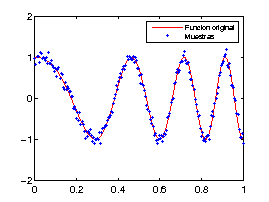

In [15]:
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;
plot(xNtot,yNtot,'r');
hold on;
ylim([-2 2])
plot(xNtot,tNtot,'+','MarkerSize',2);
h_legend=legend('Funcion original','Muestras');
set(h_legend,'FontSize',7);


#1. Regresión Lineal con máxima verosimilitud

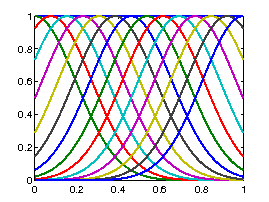

In [16]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=15;
PHI=genBasisFunction(tipofb,xNtot,Ntot,M);
plot(xNtot, PHI, 'linewidth', 1.5)


Calculo de PHI para los datos de entrenamiento.

In [17]:
PHI_train=genBasisFunction(tipofb,x,N,M);

Se calcula la solucion de maxima verosimilitud para w y beta.

In [18]:
Wml=inv(PHI_train'*PHI_train)*PHI_train'*t;
B=(1/N)*(t-PHI_train*Wml)'*(t-PHI_train*Wml);

[Warning: Matrix is close to singular or badly scaled. Results may be
inaccurate. RCOND =  3.291416e-18.] 
[  In pymat_eval at 38
  In matlabserver at 27]

Calculemos la prediccion sobre todo el espacio de entrada y se grafica

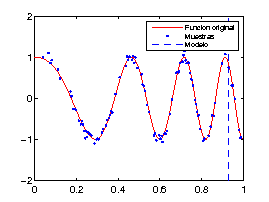

In [19]:
plot(xNtot, yNtot, 'r',x, t, '.b',xNtot,PHI*Wml,'--');
h_legend=legend('Funcion original','Muestras','Modelo');
set(h_legend,'FontSize',7);
ylim([-2 2]);

#2. Regresión Lineal con máxima verosimilitud y regularizacion cuadratica

In [20]:
%reset workspace
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;

In [21]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=50;
PHI=genBasisFunction(tipofb,xNtot,Ntot,M);
%plot(xNtot, PHI, 'linewidth', 1.5)

Calculamos PHI para los datos de entrenamiento.

In [22]:
PHI_train=genBasisFunction(tipofb,x,N,M);

Se calcula la solucion de maxima verosimilitud con regularización para w y beta.

In [23]:
lamda=0.004;
Wml=inv(lamda*eye(M)+PHI_train'*PHI_train)*PHI_train'*t;
B=(1/N)*(t-PHI_train*Wml)'*(t-PHI_train*Wml);

Calculemos la prediccion sobre todo el espacio de entrada y se grafica

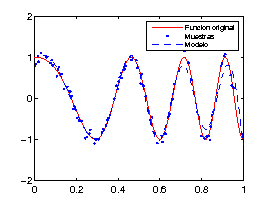

In [24]:
plot(xNtot, yNtot, 'r',x, t, '.b',xNtot,PHI*Wml,'--');
h_legend=legend('Funcion original','Muestras','Modelo');
set(h_legend,'FontSize',7);
ylim([-2 2]);

#3. Regresíon Bayesiana lineal

In [25]:
%reset workspace
plot_variance = @(x,lower,upper,color) set(fill([x,x(end:-1:1)],[upper,lower(end:-1:1)],color),'EdgeColor',color);
data=load('ejemplo_regresion.mat');
xNtot=data.x;
yNtot=data.y;
tNtot=data.t;

Se separan los datos de entrenamiento y validación.

In [26]:
Ntot=size(xNtot,1);
N=100;
index=randperm(Ntot);
t=tNtot(index(1:N));
x=xNtot(index(1:N));
tipofb='exp';
M=30;
ttest = tNtot(index(N+1:end));
xtest = xNtot(index(N+1:end));

Se calcula la matriz de diseño para lso datos de entrenamiento.

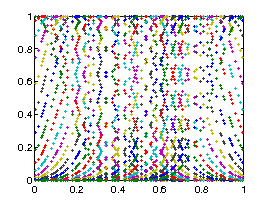

In [27]:
PHI=genBasisFunction(tipofb,x,N,M);
plot(x, PHI,'+','MarkerSize',2);

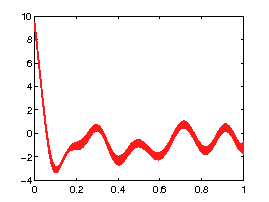

[Warning: Matrix is close to singular or badly scaled. Results may be
inaccurate. RCOND =  1.203371e-19.] 
[  In pymat_eval at 38
  In matlabserver at 27]

In [31]:
[alpha,betae]=findAlphaBeta(PHI,M,N,t);

PHIt = genBasisFunction(tipofb,xNtot,Ntot,M);
SnInv = alpha*(length(x)) + betae*(PHI'*PHI);
Sn = SnInv\eye(M);
mn = betae*(Sn*PHI'*t);
mean_pre=PHIt*mn;
varianza=inv(betae*eye(length(xNtot)))+PHIt*Sn*PHIt';
varianza=diag(sqrt(varianza'));
plot_variance(xNtot',(mean_pre-2*varianza)',(mean_pre+2*varianza)',[1 0.1 0.1])
%set(gca, 'ylim', [-1.5 1.5]);
set(gcf,'units','points','position',[0,0,500,500])